In [1]:
import pandas as pd
import matplotlib.pyplot as plot

pd.set_option('display.max_columns', None)

# 1. Load Data

In [2]:
auxiliary_data_loc = 'data/auxiliary-data/'

# auxiliary data
comm_centres_data = pd.read_csv(auxiliary_data_loc + 'sg-commerical-centres.csv')
hawker_centres_data = pd.read_csv(auxiliary_data_loc + 'sg-gov-markets-hawker-centres.csv')
population_data = pd.read_csv(auxiliary_data_loc + 'sg-population-demographics.csv')
primary_school_data = pd.read_csv(auxiliary_data_loc + 'sg-primary-schools.csv')
secondary_school_data = pd.read_csv(auxiliary_data_loc + 'sg-secondary-schools.csv')
malls_data = pd.read_csv(auxiliary_data_loc + 'sg-shopping-malls.csv')
train_stations_data = pd.read_csv(auxiliary_data_loc + 'sg-train-stations.csv')

# main data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data_new = train_data
test_data_new = test_data

# 2. Preprocessing

In [3]:
# train data shape
print('Train data shape before preprocessing: {}'.format(train_data_new.shape))

Train data shape before preprocessing: (431732, 17)


In [4]:
# see no. of unique values
print('Eco category column unique values: {}'.format(train_data_new['eco_category'].nunique()))
print('Elevation column unique values: {}'.format(train_data_new['elevation'].nunique()))

# drop unused columns
train_data_new = train_data_new.drop(columns=['street_name', 'eco_category', 'elevation'])
test_data_new = test_data_new.drop(columns=['street_name', 'eco_category', 'elevation'])

Eco category column unique values: 1
Elevation column unique values: 1


In [5]:
# check for na values
print('NA values: \n{}'.format(train_data_new.isnull().sum()))

NA values: 
month                  0
town                   0
flat_type              0
block                  0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
latitude               0
longitude              0
subzone                0
planning_area          0
region                 0
resale_price           0
dtype: int64


In [6]:
# check for duplicates
print('Duplicate values: {}'.format(train_data_new.shape[0] - train_data_new.drop_duplicates().shape[0]))

# drop the duplicates
train_data_new = train_data_new.drop_duplicates()

Duplicate values: 631


In [7]:
# replace - char to space in flat type
train_data_new['flat_type'] = train_data_new['flat_type'].str.replace('-', ' ')
test_data_new['flat_type'] = test_data_new['flat_type'].str.replace('-', ' ')

In [8]:
# train data shape after preprocessing
print('Train data shape after preprocessing: {}'.format(train_data_new.shape))

Train data shape after preprocessing: (431101, 14)


# 3. VISUALIZATIONS

## 3.1 Town Bar Chart

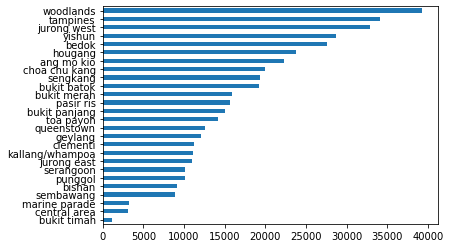

In [9]:
train_data_new['town'].value_counts().sort_values().plot(kind='barh')

## 3.2 Room Type Bar Chart

### Before cleaning

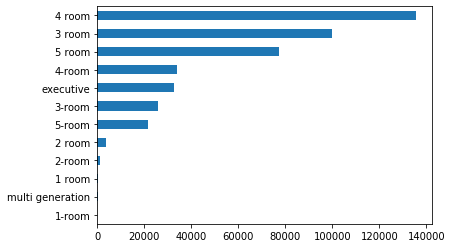

In [10]:
train_data['flat_type'].value_counts().sort_values().plot(kind='barh')

### After cleaning

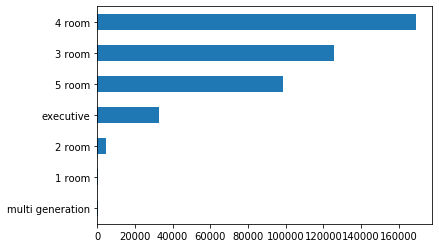

In [11]:
train_data_new['flat_type'].value_counts().sort_values().plot(kind='barh')

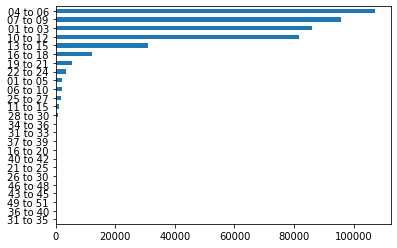

In [12]:
train_data_new['storey_range'].value_counts().sort_values().plot(kind='barh')

## 3.3 Floor Area Sqm Histogram

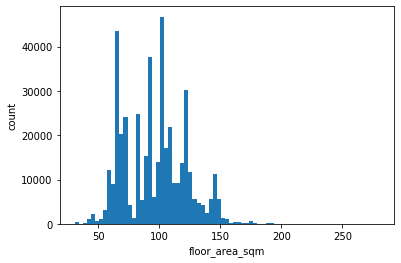

In [13]:
plot.figure()
plot.hist(train_data_new['floor_area_sqm'], bins=75)
plot.xlabel('floor_area_sqm')
plot.ylabel('count')
plot.show()

### Floor Area Sqm Box Plot

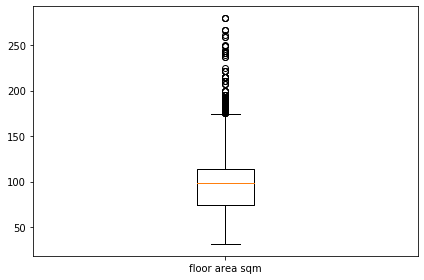

In [14]:
plot.figure()
plot.boxplot(train_data_new['floor_area_sqm'])
plot.xticks([1], ['floor area sqm'])
plot.tight_layout()
plot.show()

## 3.4 Flat Model Bar Chart

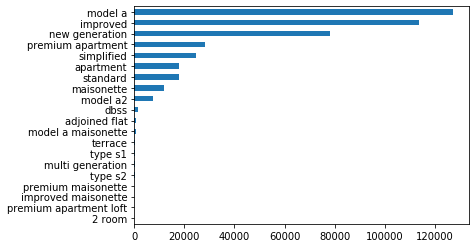

In [15]:
train_data_new['flat_model'].value_counts().sort_values().plot(kind='barh')

## 3.5 Lease Commence Date Histogram

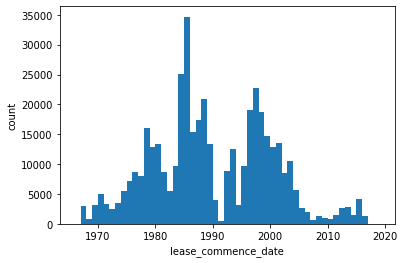

In [16]:
bins = train_data['lease_commence_date'].max() - train_data['lease_commence_date'].min()

plot.figure()
plot.hist(train_data_new['lease_commence_date'], bins= bins)
plot.xlabel('lease_commence_date')
plot.ylabel('count')
plot.show()

## 3.6 Planning Area Bar Chart

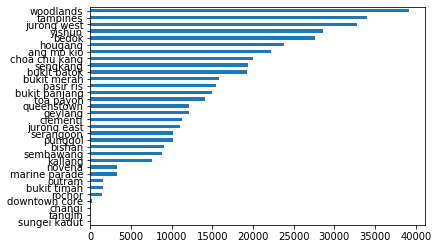

In [17]:
train_data_new['planning_area'].value_counts().sort_values().plot(kind='barh')

## 3.7 Region Bar Chart

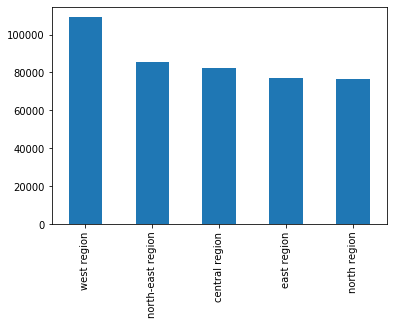

In [18]:
train_data_new['region'].value_counts().plot(kind='bar')

## 3.8 Resale Price Histogram

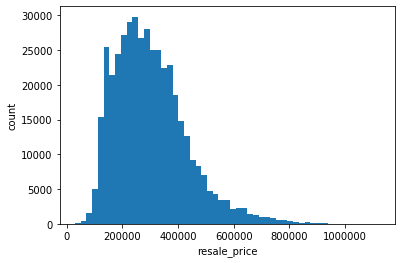

In [19]:
plot.figure()
plot.hist(train_data_new['resale_price'], bins= bins)
plot.xlabel('resale_price')
plot.ylabel('count')
plot.show()

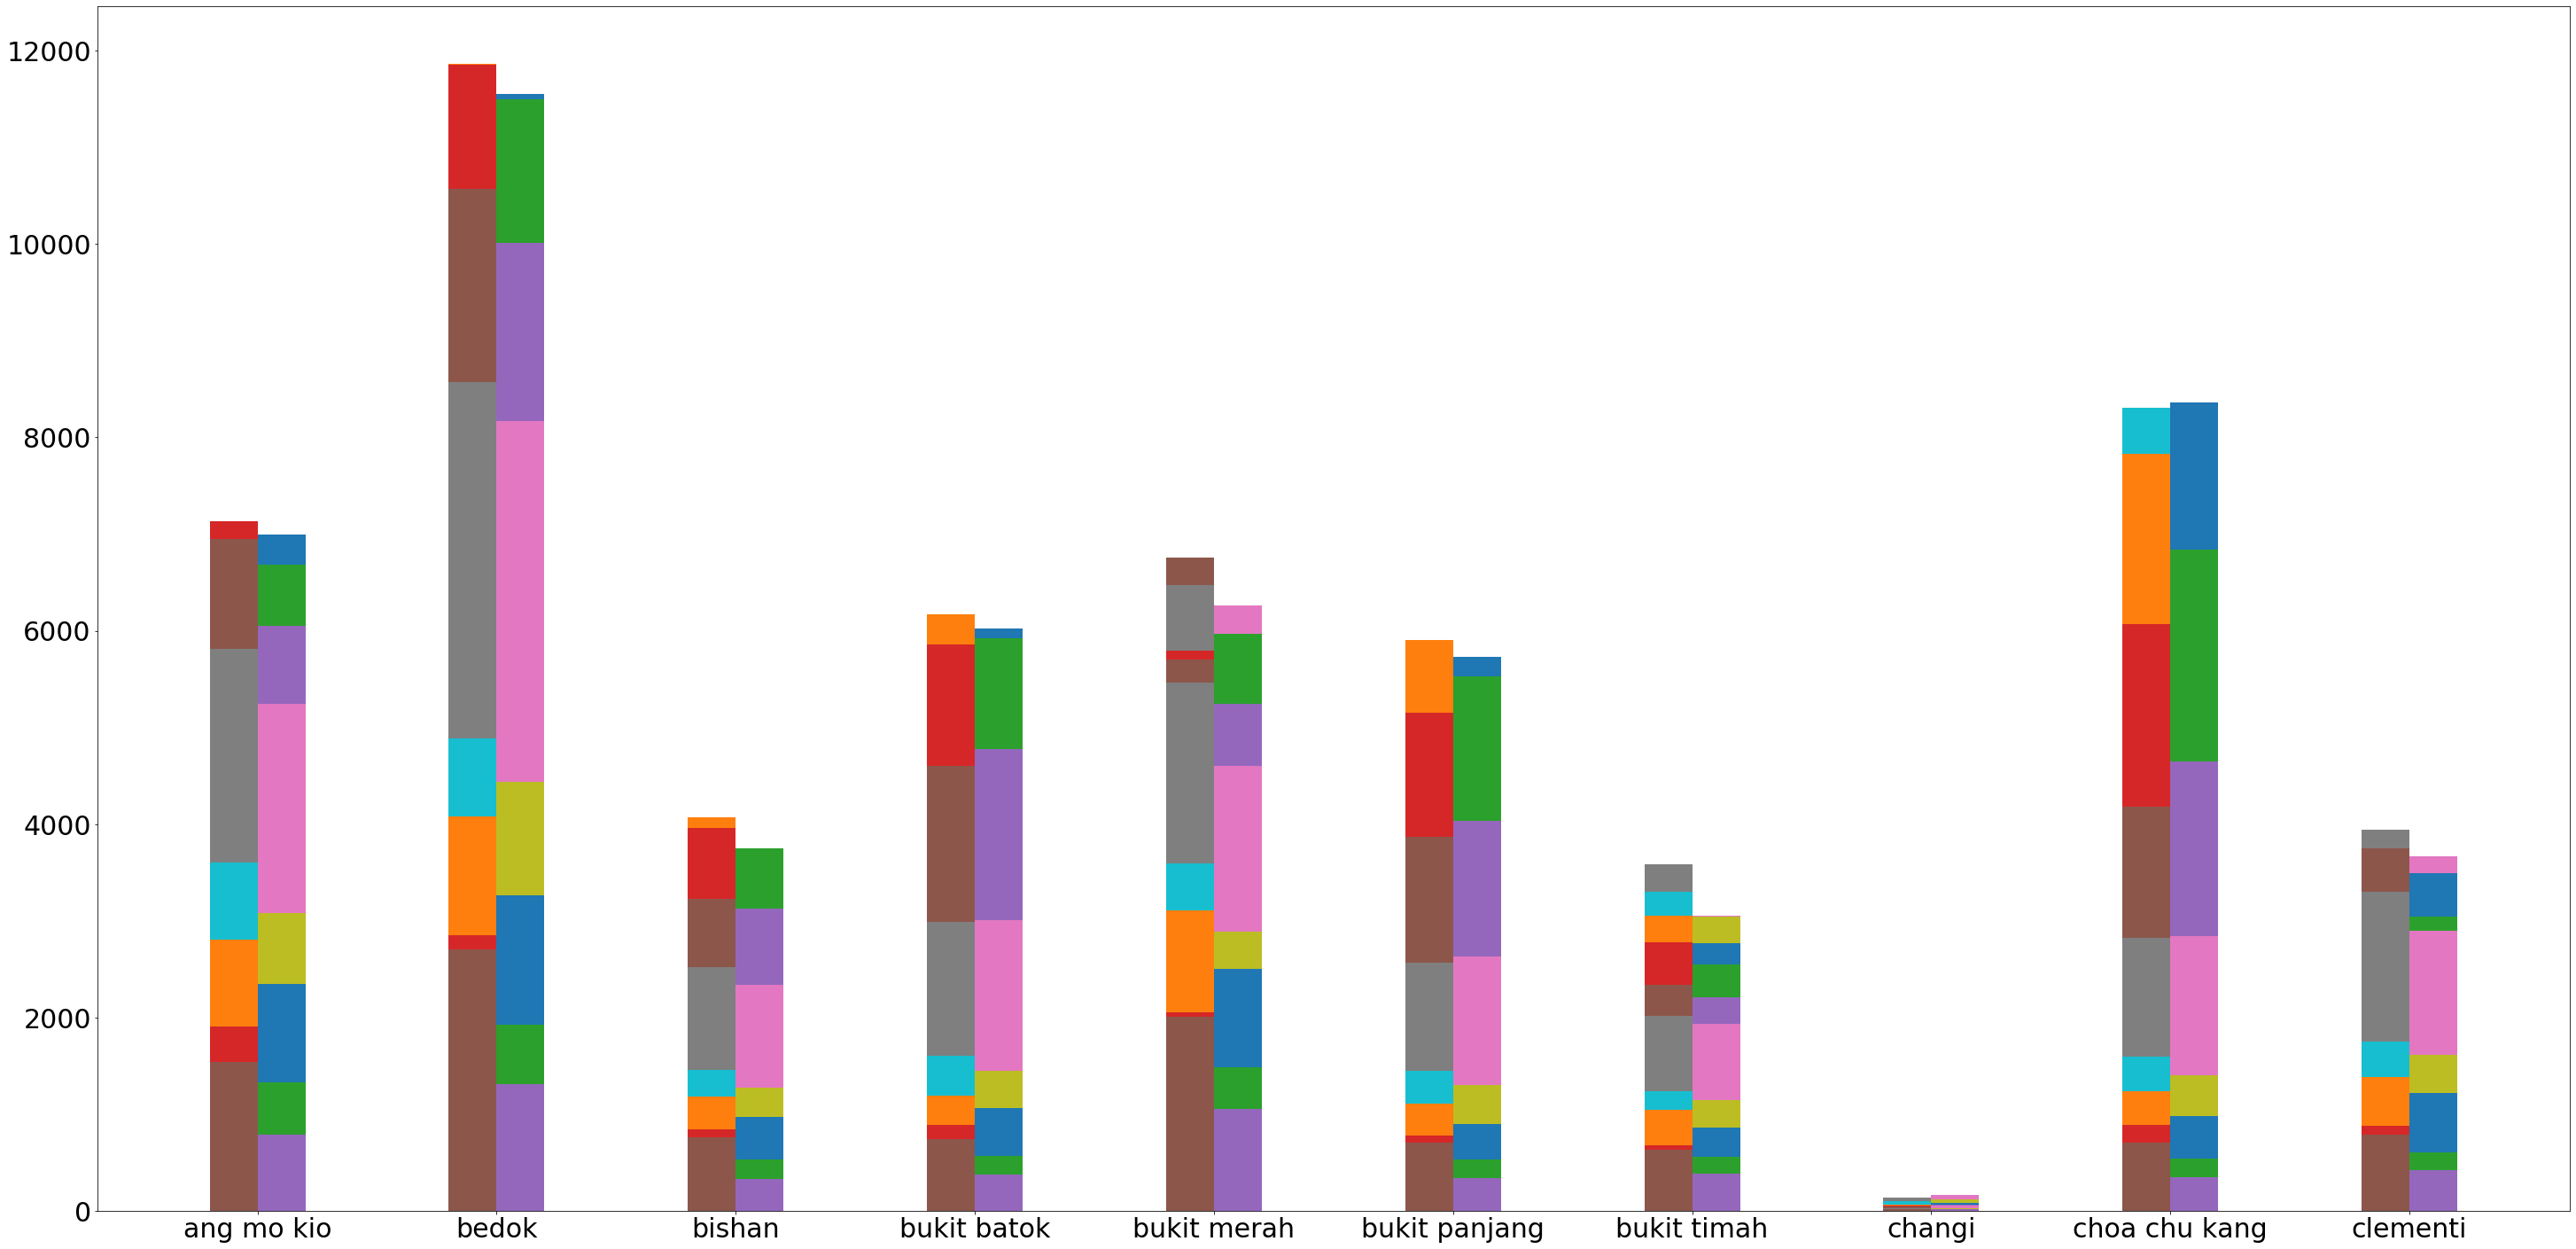

In [12]:
# testing visualizing population data

# show = 10

# planning_area = population_data['plannin_area'].unique()[:show]
# gender = ['m','f']
# age_bin = population_data['age_group'].unique()

# res = population_data.drop(columns='subzone').groupby(['sex','age_group','plannin_area']).agg({'count':sum}).reset_index()

# male_data = res[res['sex'] == 'm']
# female_data = res[res['sex'] == 'f']

# male_bar_list = []
# female_bar_list = []

# fig = plot.figure(figsize=(50,25))
# plot.tick_params(labelsize=30)

# for bin in age_bin:
#     male_bar_list.append(plot.bar(planning_area, male_data[male_data['age_group'] == bin]['count'].to_list()[:show], align='edge', width= 0.2))
#     female_bar_list.append(plot.bar(planning_area, female_data[female_data['age_group'] == bin]['count'].to_list()[:show], align='edge', width= -0.2))